In [1]:
import sys
sys.path.append('../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
# fs=20
# import ClassMSSFR
# from matplotlib.ticker import (FormatStrFormatter,
#                                AutoMinorLocator)

In [2]:
\

In [3]:
print(list(range(14)))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [72]:
fs = 28 


NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf

NSNSrate1 = [250,2810] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
BHBHrate1 = [9.7,101] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
BHNSrate1 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 


BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf

ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]


def plotDCOrates(DCOtype='BHNS'):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,10))
    

    
    ############## 2nd panel on the right ##########################
    ################################################################
    
#     nComparisons = 14
#     xx = np.asarray(range(nComparisons)) -1 
#     xmin, xmax = np.min(xx), np.max(xx) 
    
    
    # Number of studies we have available to compare with; 
    Ncompare = 12

     
    df_name = '/Users/floorbroekgaarden/Downloads/'+DCOtype+'_intrinsic.csv'
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
    for ind_n, name in enumerate(df.columns):
        rate = df[name]
        mask_notna = (df[name].notna())
        rate = rate[mask_notna]
        colors = sns.color_palette("husl", len(rate))
        axe.scatter(rate,  ind_n*np.ones_like(rate), s=105, c='gray', zorder=10)
        

        
        plt.errorbar(x=[np.min(rate),np.max(rate)], y=2*[ind_n], yerr=2*[0.5], color='gray', zorder=10)

        
        
        
        
    # axes layout and mark up 
    axe.set_xscale('log')
    xlabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'$- $', fontsize=fs, setMinor=False)
    bps_names = []
    for ind_m, bps_model in enumerate(df.columns):
        bps_names.append(r'\textbf{%s}'%(bps_model) )
    axe.set_yticks(range(len(df.columns)))
    axe.set_yticklabels(bps_names, rotation=0, fontsize=18)

    axe.set_xlim(1E-3, 1E4)
    
    
    

#     else:
#         axe[ind_t,1].set_xticks([])
#         axe[ind_t,1].set_xticklabels( () )
                
    




            
    ######################
    # make up all the nice things in background and axes
    
#     for ind_t, DCOtype in enumerate(Types):
#         axe[ind_t,1].set_xlim(xmin, xmax)
#         axe[ind_t,1].set_yscale('log')    
#         axe[ind_t,1].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
    
    
    
#         if whichRate=='intrinsic':
#             # if plotting intrinsic rates, plot the areas from the LIGO/Virgo detected confidence interval for the rate 
    DCOtypeIndexDict = {'BHBH':0, 'BHNS':1, 'NSNS':2}
    ind_t=DCOtypeIndexDict[DCOtype]
    
    xx = np.linspace(-100, 100, 100)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
    if ind_t in [1,2]:
        axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=2)


    elif ind_t ==0:
        # for BHBH rates also plot intrinsic z=0 estimated rates based on a redshift model
        min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
        max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
        axe.fill_betweenx(y=xx, x1=min_obs_rate2, x2=max_obs_rate2,  alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=0)
        axe.plot(min_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)
        axe.plot(max_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)

    # for BHNS plot that its a upper limit
    if ind_t==1:
        axe.scatter(max_obs_rate, xx, marker=8, color=DCOtypeColorsDict[DCOtype], zorder=0, s=120)    

    
    axe.set_ylim(-1,len(df.columns))
    
    
    
#         CHECK WHICH ONES HAVE CONSISTENT RATES FOR ALL 3 DCO TYPES: 
#     df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
#     df_name_BHBH = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
#     df_name_BHNS = '/Users/floorbroekgaarden/Downloads/BHNS_intrinsic.csv'
#     df_name_NSNS = '/Users/floorbroekgaarden/Downloads/NSNS_intrinsic.csv'
    
#     df_BHBH = pd.read_csv(df_name_BHBH, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
#     df = df_BHBH
#     df_BHNS = pd.read_csv(df_name_BHNS, header=0, skiprows=list(range(14)), usecols=np.asarray(range(Ncompare))+1)
#     df_NSNS = pd.read_csv(df_name_NSNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)        
#     for ind_n, name in enumerate(df_NSNS.columns):
#         rate_BHBH = df_BHBH[name][df_BHBH[name].notna()]#.astype(float)
#         rate_BHNS = df_BHNS[name][df_BHNS[name].notna()]#.astype(float)
#         rate_NSNS = df_NSNS[name][df_NSNS[name].notna()]#.astype(float)

#         maskBHBH = (rate_BHBH>= BHBHratez0[0]) & (rate_BHBH <=BHBHratez0[1])
#         maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
#         maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])

#         maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 

#         if DCOtype=='BHBH':
#             axe.scatter(  ind_n*np.ones_like(rate_BHBH)[maskGWTC2], rate_BHBH[maskGWTC2], s=145, c='r', marker='x')
#         elif DCOtype=='BHNS':
#             axe.scatter(  ind_n*np.ones_like(rate_BHNS)[maskGWTC2], rate_BHNS[maskGWTC2], s=145, c='r', marker='x')
#         elif DCOtype=='NSNS':
#             axe.scatter(  ind_n*np.ones_like(rate_NSNS)[maskGWTC2], rate_NSNS[maskGWTC2], s=145, c='r', marker='x')


            
    
    
    
    
    ################################################################
    ################################################################
    ################################################################
    
    
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




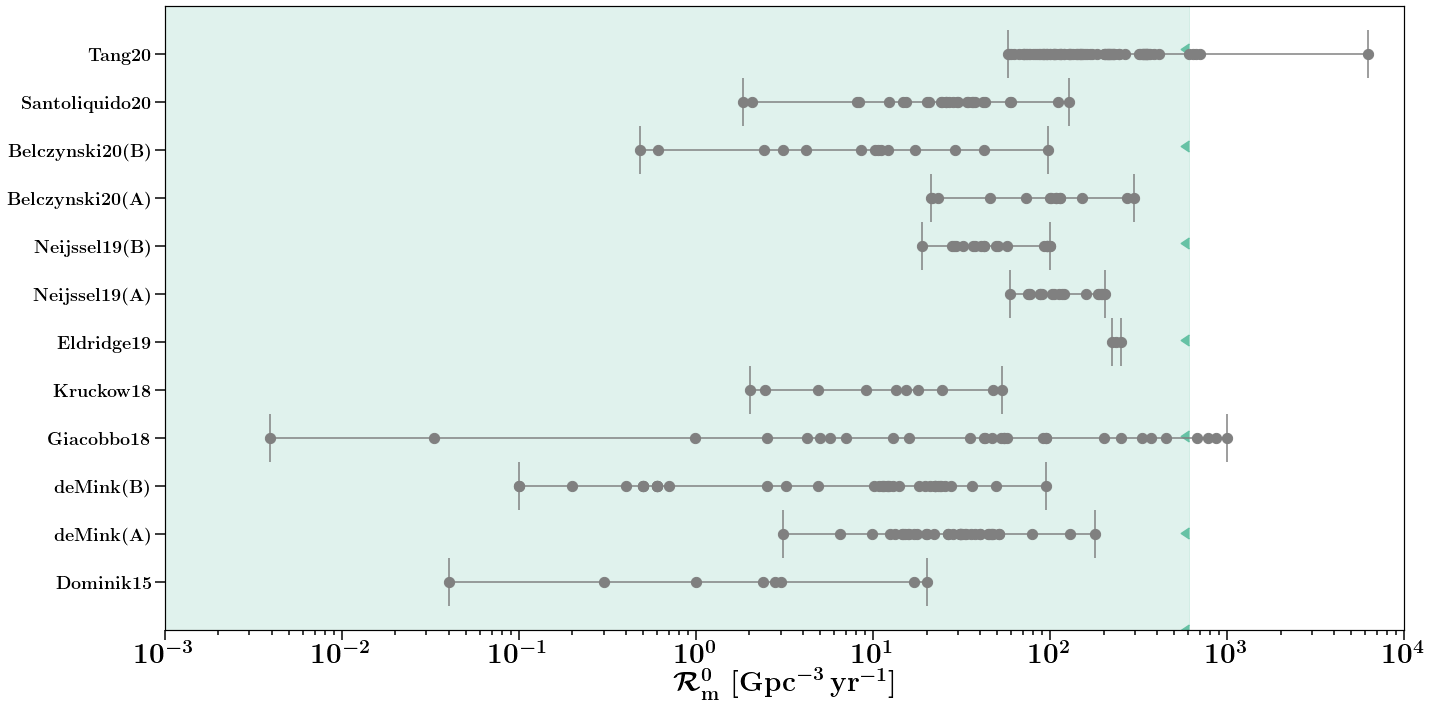

In [73]:


plotDCOrates(DCOtype='BHNS')

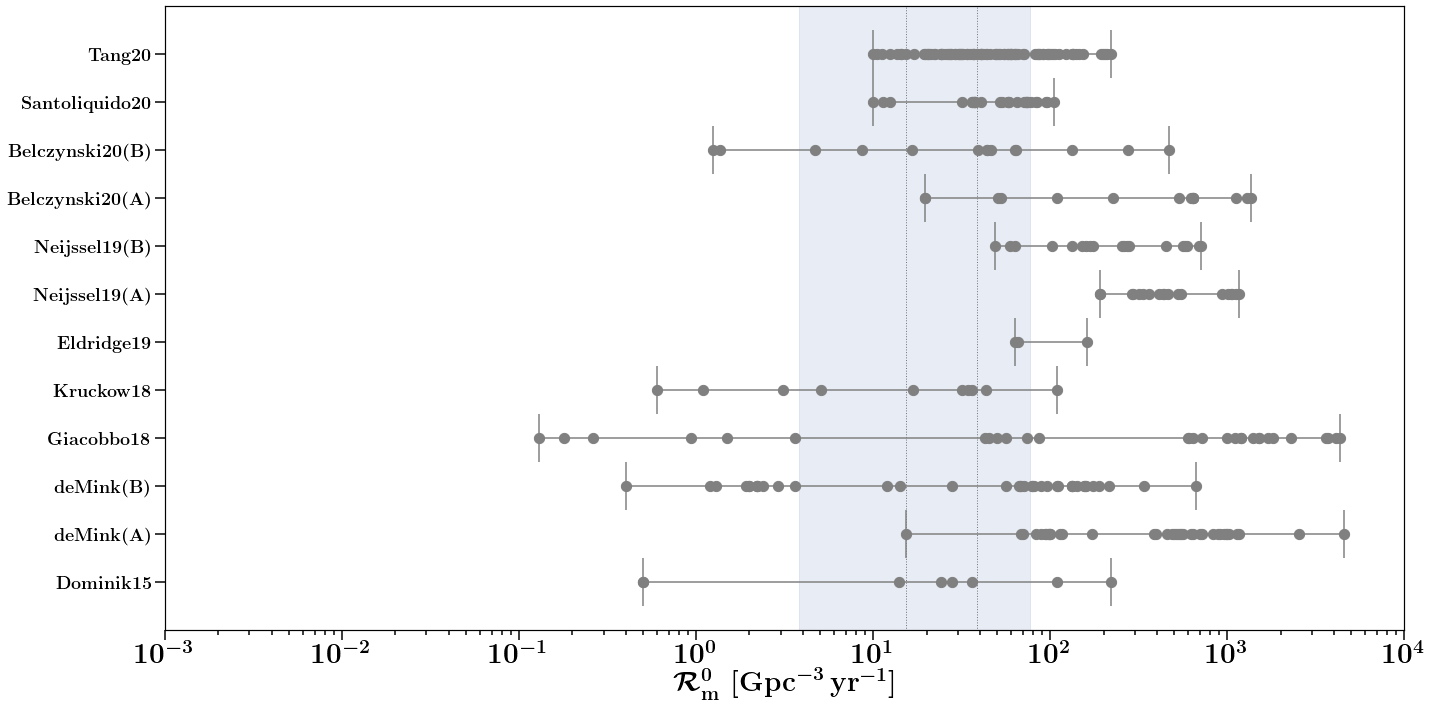

In [60]:


plotDCOrates(DCOtype='BHBH')

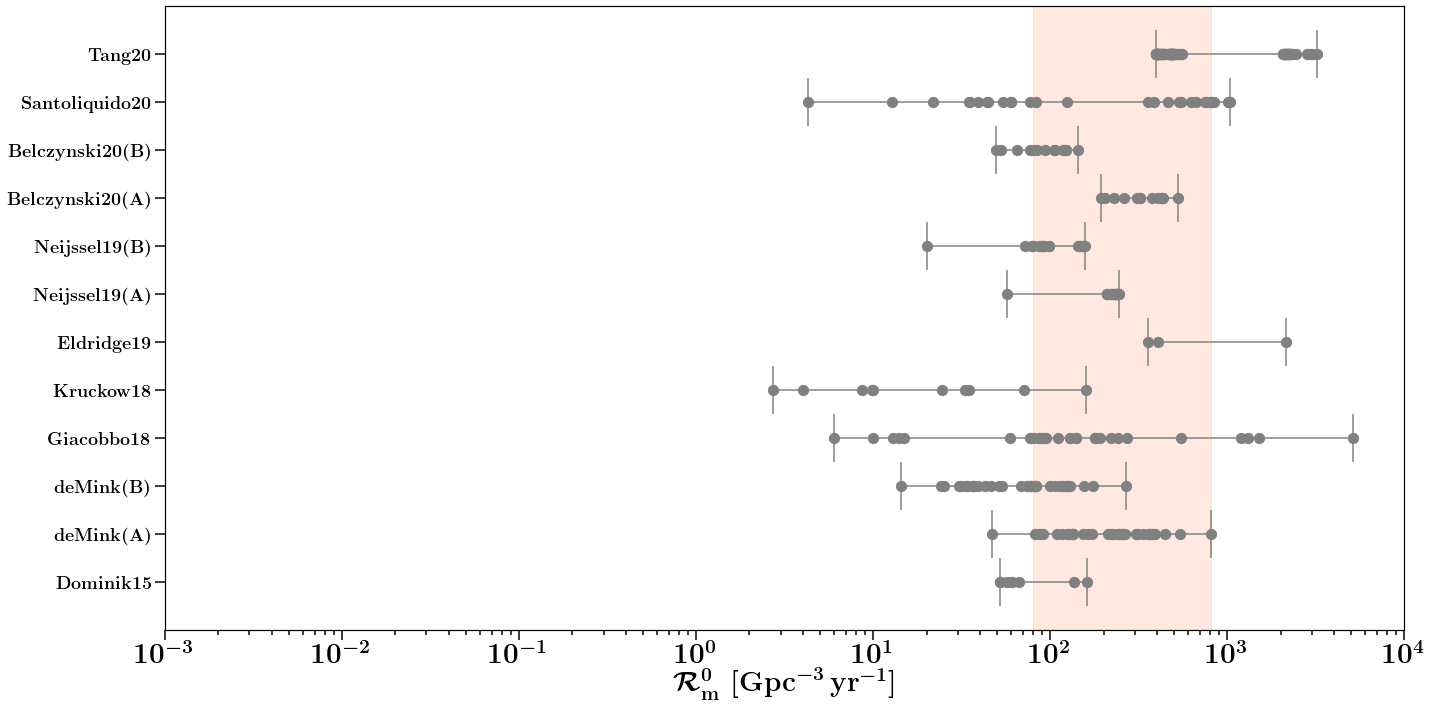

In [61]:


plotDCOrates(DCOtype='NSNS')

# Plot the same figure as above, but with each line SFRD(Z,z) line seperately 

In [6]:
fs = 28 


NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf

NSNSrate1 = [250,2810] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
BHBHrate1 = [9.7,101] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
BHNSrate1 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 


BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf




def plotDCOrates_seperate(whichRate='intrinsic', mssfr_ind=0):
    '''
    mssfr_ind = number from 0 to 27 for the index of the mssfr model
    '''
    ncols=2
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,16), 
                  gridspec_kw={"width_ratios":[2,0.8], "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ObservedRatesListOld = [BHBHrate1, BHNSrate1, NSNSrate1]
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    

    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    
    for ind_t, DCOtype in enumerate(Types):
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            if ind_L == mssfr_ind:

                stringgg = 'AllDCOsimulation'
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
                    if MSSFRname=='000':
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'







                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'




                COLOR=TypeColours[ind_t]#'teal'
                zorder=10
                label=MSSFRnameslist[ind_L] 
                ALPHA=1
                lw=5

                if MSSFRname=='231': 
                    ls = MSSFRlinestyles[1]
                elif MSSFRname=='312':
                    ls = MSSFRlinestyles[2]
                else:
                    ls = MSSFRlinestyles[0]


                axe[ind_t,0].plot(range(len(rates)), rates, c=COLOR, lw=lw, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe[ind_t,0].scatter(range(len(rates)), rates, c=COLOR, s=100, label=label, zorder=zorder, alpha=ALPHA, linestyle=ls)
                # plot fiducial result with a star
    #             if ind_L==0:
    #                 axe[ind_t,0].scatter(range(len(rates))[0], rates[0],\
    #                                    c=COLOR, s=250, label=label, \
    #                                    zorder=1000, marker='*', edgecolor='black')




        ## set some of the axes ranges 
        xmin = -0.8
        xmax = nModels -0.5 # change to len(df.T)
#         xmax_compare = xmax+5


        # FIX
        fix=1



        # calculate statistics: 
        minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)




#             print('mean scatter per MSSFR:')
#         print((minMaxPerMSSFR[1] / minMaxPerMSSFR[0]))
#         print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
        meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))

#             print('mean scatter per BPS:')
#         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#         print(minMaxPerBPS[1]/minMaxPerBPS[0])
#         print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
        meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
#         x = nrDATAready 
        textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
        textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
        minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

        if whichRate=='intrinsic':
            textt_min = r'$\mathcal{R}^0_{\rm{m,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}^0_{\rm{m,max}} = %s $'%roundAndFormat(maxx)
        elif whichRate=='observed':
            textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)
        xloc_text = 0.8502
        axe[ind_t,0].text(xloc_text, 0.1, s=r'$\rm{xyz} = $ %s'%MSSFRnameslist[mssfr_ind], rotation = 0, fontsize = fs, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)


        ## MAKE RANGE ERROR LINE: 
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe[ind_t,0].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe[ind_t,0].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')


        axe[ind_t,0].text(-0.6, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
        axe[ind_t,0].text(-0.6, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')





        xx = np.linspace(xmin,xmax,15)

        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            axe[ind_t,0].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)


            if ind_t ==0:
                # for BHBH rates also plot intrinsic z=0
                min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
                max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
                axe[ind_t,0].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=0)
                axe[ind_t,0].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=0)
                axe[ind_t,0].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.5,  zorder=1, facecolor="none", edgecolor=TypeColours[ind_t], hatch="x", linewidth=0.0)
                axe[ind_t,0].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.5,  zorder=1, facecolor="none", edgecolor=TypeColours[ind_t], hatch="x", linewidth=0.0)


            # for BHNS plot that its a upper limit
            elif ind_t==1:
                axe[ind_t,0].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=30)

        else:
            for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                axe[ind_t,0].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
            axe[ind_t,0].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


#         # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe[ind_t,0].set_xlim(xmin, xmax)
        axe[ind_t,0] == layoutAxes(axe[ind_t,0], nameX=xlabel, nameY=ylabel, setMinor=False)
        axe[ind_t,0].set_yscale('log')

         # Set the tick labels
#         if ind_t==2:
        axe[ind_t,0].set_xticks(range(nModels))




        #############################


        axe[ind_t,0].set_xticklabels(BPSnameslist)

        axe[ind_t,0].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

        axe[ind_t,0].text(xloc_text, 0.88, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')



        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe[ind_t,0].twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)      


        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe[ind_t,0].set_xticks(range(nModels))
            axe[ind_t,0].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe[ind_t,0].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        else:
            axe[ind_t,0].set_xticks([])
            axe[ind_t,0].set_xticklabels( () )

    # mark the simulations where all 3 DCO flavors are consistent with 90% confidence interval red.      
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        if ind_L==mssfr_ind:
            for ind_t, DCOtype in enumerate(Types):
            
                stringgg = 'AllDCOsimulation'
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $' 



                if ind_t==0:
                    rate_BHBH = rates
                elif ind_t==1:
                    rate_BHNS = rates
                elif ind_t==2:
                    rate_NSNS = rates 

            maskBHBH = (rate_BHBH>= BHBHratez0[0]) & (rate_BHBH <=BHBHratez0[1])
            maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
            maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])

            maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 


            axe[0,0].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHBH[maskGWTC2], s=180, c='r', marker='x', zorder=1E8)
            axe[1,0].scatter((np.array(range(len(rates))))[maskGWTC2], rate_BHNS[maskGWTC2], s=180, c='r', marker='x', zorder=1E8)
            axe[2,0].scatter((np.array(range(len(rates))))[maskGWTC2], rate_NSNS[maskGWTC2], s=180, c='r', marker='x', zorder=1E8)

    ################################################################ 
    ############## 2nd panel on the right ##########################
    ################################################################
    
    nComparisons = 14
    xx = np.asarray(range(nComparisons)) -1 
    xmin, xmax = np.min(xx), np.max(xx) 
    
    
    
    Ncompare = 12
    if whichRate=='intrinsic':
        for ind_t, DCOtype in enumerate(Types):            
            df_name = '/Users/floorbroekgaarden/Downloads/'+TypesLabels[ind_t]+'_intrinsic.csv'
            df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                colors = sns.color_palette("husl", len(rate))
                axe[ind_t,1].scatter(  ind_n*np.ones_like(rate), rate, s=30, c='gray')
        
            
            axe[ind_t,1] = layoutAxesNoXlabel(axe[ind_t,1], nameX=r'$-$', nameY=r'$- $', fontsize=18, setMinor=False)
            if ind_t==2:
                physicalnames = []
                for ind_m, bps_model in enumerate(df.columns):
                    physicalnames.append(r'\textbf{%s}'%(bps_model) )
                axe[ind_t,1].set_xticks(range(len(df.columns)))
                axe[ind_t,1].set_xticklabels(physicalnames, rotation=75, fontsize=18)
                
                axe[ind_t,1].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
                
            else:
                axe[ind_t,1].set_xticks([])
                axe[ind_t,1].set_xticklabels( () )
                
         
            
        df_name_BHBH = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
        df_name_BHNS = '/Users/floorbroekgaarden/Downloads/BHNS_intrinsic.csv'
        df_name_NSNS = '/Users/floorbroekgaarden/Downloads/NSNS_intrinsic.csv'

        df_BHBH = pd.read_csv(df_name_BHBH, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
        df_BHNS = pd.read_csv(df_name_BHNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
        df_NSNS = pd.read_csv(df_name_NSNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)        
        for ind_n, name in enumerate(df.columns):
            rate_BHBH = df_BHBH[name][df_BHBH[name].notna()]#.astype(float)
            rate_BHNS = df_BHNS[name][df_BHNS[name].notna()]#.astype(float)
            rate_NSNS = df_NSNS[name][df_NSNS[name].notna()]#.astype(float)
            
            maskBHBH = (rate_BHBH>= BHBHratez0[0]) & (rate_BHBH <=BHBHratez0[1])
            maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
            maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])
            
            maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 
            
            
            axe[0,1].scatter(  ind_n*np.ones_like(rate_BHBH)[maskGWTC2], rate_BHBH[maskGWTC2], s=75, c='r', marker='x')
            axe[1,1].scatter(  ind_n*np.ones_like(rate_BHNS)[maskGWTC2], rate_BHNS[maskGWTC2], s=75, c='r', marker='x')
            axe[2,1].scatter(  ind_n*np.ones_like(rate_NSNS)[maskGWTC2], rate_NSNS[maskGWTC2], s=75, c='r', marker='x')
          
 
            



            
    ######################
    # make up all the nice things in background and axes
    
    for ind_t, DCOtype in enumerate(Types):
        axe[ind_t,1].set_xlim(xmin, xmax)
        axe[ind_t,1].set_yscale('log')    
        axe[ind_t,1].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
    
    
    
        if whichRate=='intrinsic':
            # if plotting intrinsic rates, plot the areas from the LIGO/Virgo detected confidence interval for the rate 
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            axe[ind_t,1].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=2)

            
            if ind_t ==0:
                # for BHBH rates also plot intrinsic z=0 estimated rates based on a redshift model
                min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
                max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
#                 axe[ind_t,1].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=1, facecolor="none", edgecolor="k", hatch="x")
#                 axe[ind_t,1].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=1, facecolor="none", edgecolor="k", hatch="x")            
                axe[ind_t,1].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=0)
                axe[ind_t,1].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=0)
                axe[ind_t,1].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.5,  zorder=1, facecolor="none", edgecolor=TypeColours[ind_t], hatch="x", linewidth=0.0)
                axe[ind_t,1].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.5,  zorder=1, facecolor="none", edgecolor=TypeColours[ind_t], hatch="x", linewidth=0.0)
                 
            
            # for BHNS plot that its a upper limit
            elif ind_t==1:
                axe[ind_t,1].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=30)    
    

    ################################################################
    ################################################################
    ################################################################
    

            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.06)#2)
    plt.savefig('./supplementary_material/Rates_' +whichRate + '_'+ MSSFRnameslist[mssfr_ind] + '.png', dpi=300, transparent=False)#,\
#     plt.savefig('./Rates_' +whichRate + '_with_GWTC2_and_comparisonBPS.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return





NameError: name 'MSSFRnameslistCSV' is not defined

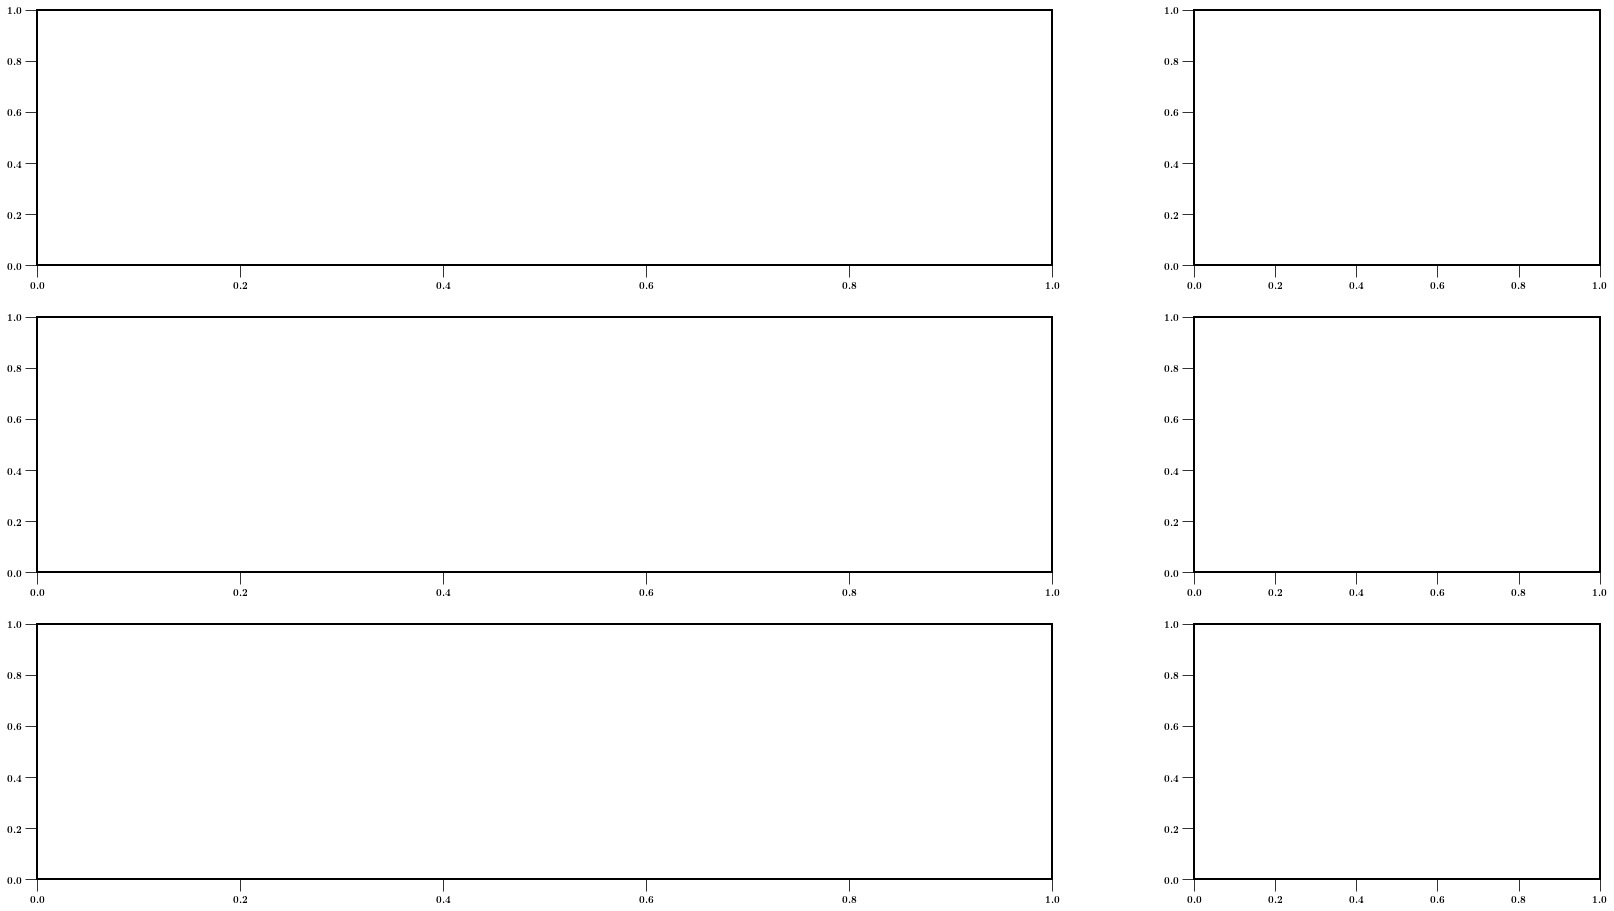

In [7]:
for ind_mssfr in range(28):
    
    ylims =[[2,3000],[0.005,10000],[0.05,1000]]
    plotDCOrates_seperate(whichRate='intrinsic', mssfr_ind=ind_mssfr)